# 🛒 EDA for E-Commerce Sales Data

**Objective:**  
Perform Exploratory Data Analysis (EDA) on an e-commerce sales dataset to uncover trends, customer behavior, and business insights that can help improve performance.

---

## 📘 Table of Contents
1. [Introduction](#intro)
2. [Data Cleaning & Preparation](#cleaning)
3. [Sales Trends](#trends)
4. [Regional & Customer Insights](#region)
5. [Category & Product Insights](#category)
6. [Operational Insights](#operations)
7. [Business Recommendations](#recommendations)

---

<a id="intro"></a>
## 🎯 1. Introduction

This project explores a dataset of ~9,800 e-commerce orders from 2015–2018.  
Through data cleaning, analysis, and visualization, we identify patterns in sales, shipping, customer segments, and product categories.

**Key Questions:**
- When are sales the highest or lowest?  
- Which regions and customers contribute most to revenue?  
- What product categories drive performance?  
- How do shipping times impact sales?

**Tools Used:** `Python`, `Pandas`, `Matplotlib`, `Seaborn`


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', 50)
plt.rcParams['figure.figsize'] = (10, 5)

# Load your dataset
df = pd.read_csv("/content/train.csv", encoding='unicode_escape')

# Preview
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [3]:
print("Shape of the dataset:", df.shape)
print("\nColumn names:", df.columns.tolist())

print("\nData Types:")
print(df.dtypes)

print("\nMissing values per column:")
print(df.isnull().sum())


Shape of the dataset: (9800, 18)

Column names: ['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales']

Data Types:
Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

Missing values per column:
Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
P

In [4]:
df.describe()


,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [5]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

if duplicates > 0:
    df = df.drop_duplicates()
    print("Duplicates removed. New shape:", df.shape)


Number of duplicate rows: 0


---

<a id="cleaning"></a>
## 🧹 2. Data Cleaning & Preparation

In this section, we:
- Checked for missing values and duplicates  
- Converted date columns into datetime format  
- Filled missing postal codes with the mode value  
- Added new time-based features (`year`, `month`, `weekday`, `lead_time_days`)

This ensures the dataset is clean, consistent, and ready for analysis.


In [6]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.head(3)


,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub-category,product_name,sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62


In [9]:
# Convert order_date and ship_date to datetime
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
df['ship_date']  = pd.to_datetime(df['ship_date'], errors='coerce')

# Fill missing postal_code with the most common value
df['postal_code'] = df['postal_code'].fillna(df['postal_code'].mode()[0])

# Round and convert postal_code to integer
df['postal_code'] = df['postal_code'].round().astype('Int64')

# Add new columns for year, month, weekday
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month
df['month_name'] = df['order_date'].dt.month_name()
df['weekday'] = df['order_date'].dt.day_name()

# Add lead time (days between order and shipping)
df['lead_time_days'] = (df['ship_date'] - df['order_date']).dt.days.clip(lower=0)


In [10]:
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   row_id          9800 non-null   int64         
 1   order_id        9800 non-null   object        
 2   order_date      3959 non-null   datetime64[ns]
 3   ship_date       3815 non-null   datetime64[ns]
 4   ship_mode       9800 non-null   object        
 5   customer_id     9800 non-null   object        
 6   customer_name   9800 non-null   object        
 7   segment         9800 non-null   object        
 8   country         9800 non-null   object        
 9   city            9800 non-null   object        
 10  state           9800 non-null   object        
 11  postal_code     9800 non-null   Int64         
 12  region          9800 non-null   object        
 13  product_id      9800 non-null   object        
 14  category        9800 non-null   object        
 15  sub-

---

<a id="trends"></a>
## 📊 3. Sales Trends

Here, we explore how sales have changed over time to identify seasonal and yearly patterns.

### 3.1 Monthly Sales Trend  
### 3.2 Yearly Comparison  
### 3.3 Average Monthly Sales  
### 3.4 Sales by Weekday


In [12]:
df['order_month'] = df['order_date'].dt.to_period('M').dt.to_timestamp()


/tmp/ipython-input-2710495103.py:16: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


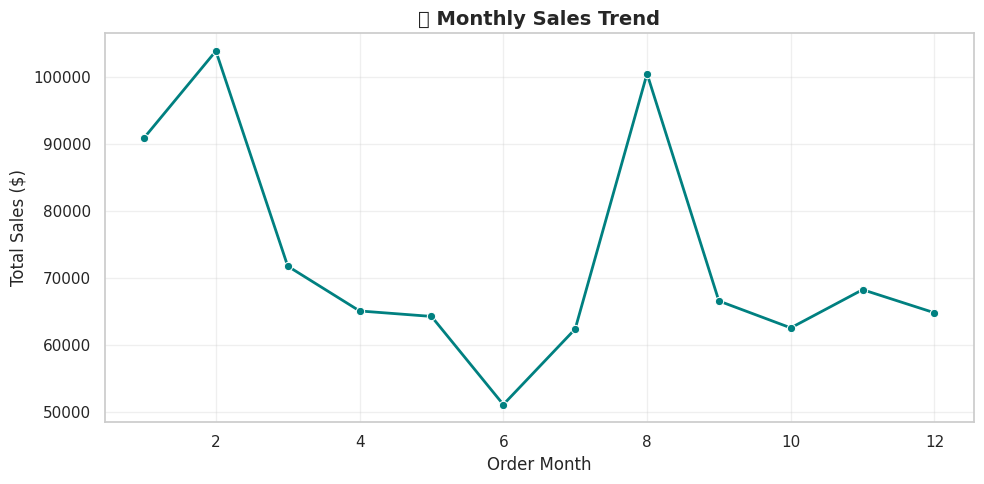

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure Seaborn style is nice and consistent
sns.set_theme(style="whitegrid", palette="coolwarm")

# Group by month
monthly_sales = df.groupby('month')['sales'].sum().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_sales, x='month', y='sales', marker='o', color='teal', linewidth=2)
plt.title('📈 Monthly Sales Trend', fontsize=14, weight='bold')
plt.xlabel('Order Month')
plt.ylabel('Total Sales ($)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

> 💡 **Insight:**  
> Sales rise noticeably during the final months of each year, suggesting a strong holiday season effect.
> The company could focus more on end-of-year promotions to maximize revenue.


/tmp/ipython-input-2493758947.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=yearly_sales, x='year', y='sales', palette='Blues_d')
/tmp/ipython-input-2493758947.py:16: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


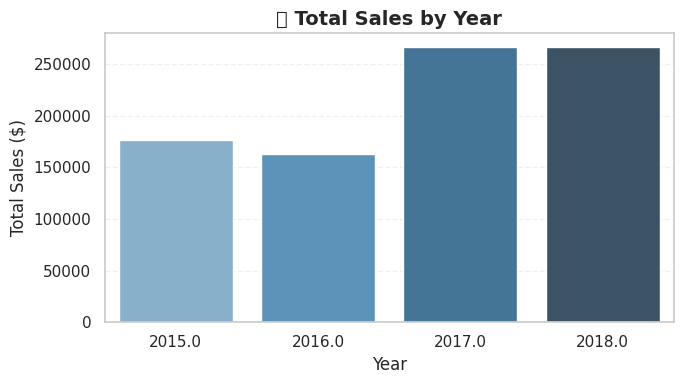

In [15]:
# --- Yearly Total Sales ---
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'year' and sum up total sales for each year
yearly_sales = df.groupby('year')['sales'].sum().reset_index()

# Plot
plt.figure(figsize=(7,4))
sns.barplot(data=yearly_sales, x='year', y='sales', palette='Blues_d')

plt.title('💰 Total Sales by Year', fontsize=14, weight='bold')
plt.ylabel('Total Sales ($)')
plt.xlabel('Year')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


> 💡 **Insight:**  
> Sales have shown consistent year-over-year growth from 2015 to 2018, indicating business expansion and strong customer retention.


/tmp/ipython-input-2542474184.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_sales, x='month', y='sales', palette='magma')
/tmp/ipython-input-2542474184.py:15: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


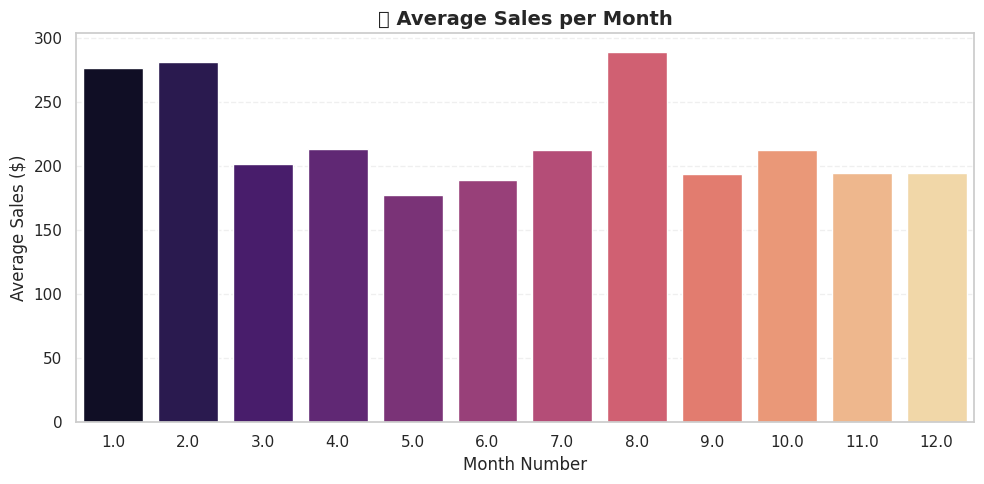

In [16]:
# --- Average Monthly Sales ---
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'month' and find average sales
avg_sales = df.groupby('month')['sales'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(data=avg_sales, x='month', y='sales', palette='magma')

plt.title('📊 Average Sales per Month', fontsize=14, weight='bold')
plt.ylabel('Average Sales ($)')
plt.xlabel('Month Number')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


> 💡 **Insight:**  
> The highest average sales occur in May and August, while some mid-year months are weaker potential opportunity for marketing boosts in slow periods.


/tmp/ipython-input-646633093.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weekday_sales, x='weekday', y='sales', palette='viridis')
/tmp/ipython-input-646633093.py:17: UserWarning: Glyph 128467 (\N{SPIRAL CALENDAR PAD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128467 (\N{SPIRAL CALENDAR PAD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


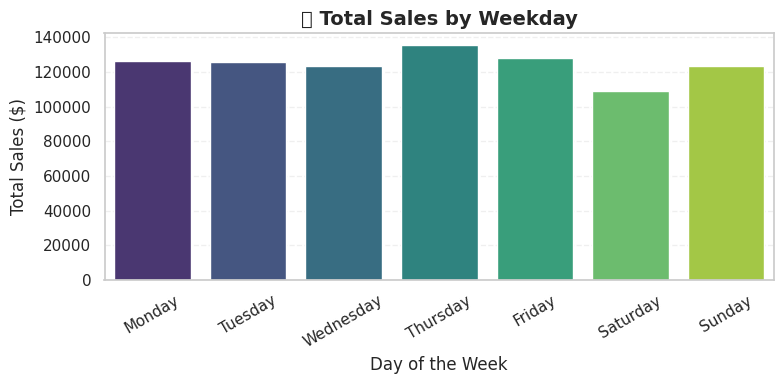

In [17]:
# --- Total Sales by Weekday ---
import matplotlib.pyplot as plt
import seaborn as sns

# Group by weekday and sum the total sales
weekday_sales = df.groupby('weekday')['sales'].sum().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']).reset_index()

plt.figure(figsize=(8,4))
sns.barplot(data=weekday_sales, x='weekday', y='sales', palette='viridis')

plt.title('🗓️ Total Sales by Weekday', fontsize=14, weight='bold')
plt.ylabel('Total Sales ($)')
plt.xlabel('Day of the Week')
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


> 💡 **Insight:**  
> Thursday and Saturday show the highest sales volume, implying increased shopping activity near the weekend.


---

<a id="region"></a>
## 🌍 4. Regional & Customer Insights

This section reveals where the company performs best and who its main customers are.

### 4.1 Sales by Region  
### 4.2 Top 10 States by Sales  
### 4.3 Sales by Customer Segment  
### 4.4 Sales by Shipping Mode


/tmp/ipython-input-2900498982.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_sales, x='region', y='sales', palette='crest')
/tmp/ipython-input-2900498982.py:14: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


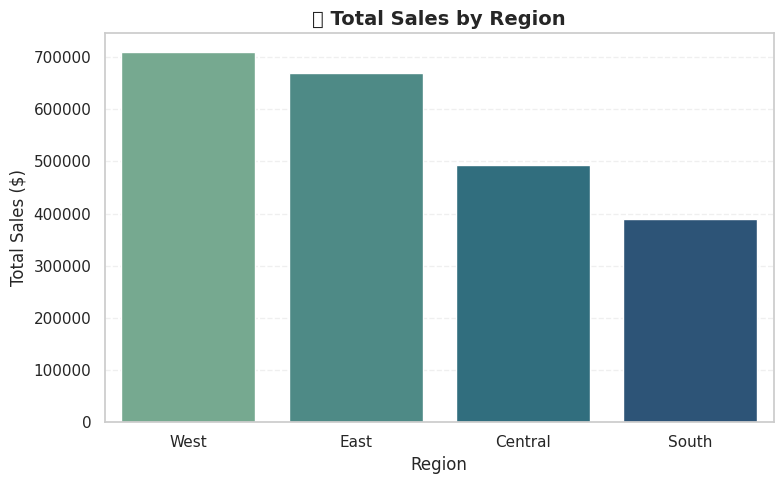

In [18]:
# --- Total Sales by Region ---
import matplotlib.pyplot as plt
import seaborn as sns

region_sales = df.groupby('region')['sales'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=region_sales, x='region', y='sales', palette='crest')

plt.title('🌍 Total Sales by Region', fontsize=14, weight='bold')
plt.ylabel('Total Sales ($)')
plt.xlabel('Region')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


> 💡 **Insight:**  
> The West region contributes the highest revenue, while the Central region** lags behind.  
> Targeted promotions could help improve sales in underperforming regions.


/tmp/ipython-input-2247114291.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_sales, y='state', x='sales', palette='rocket')
/tmp/ipython-input-2247114291.py:14: UserWarning: Glyph 127961 (\N{CITYSCAPE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127961 (\N{CITYSCAPE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


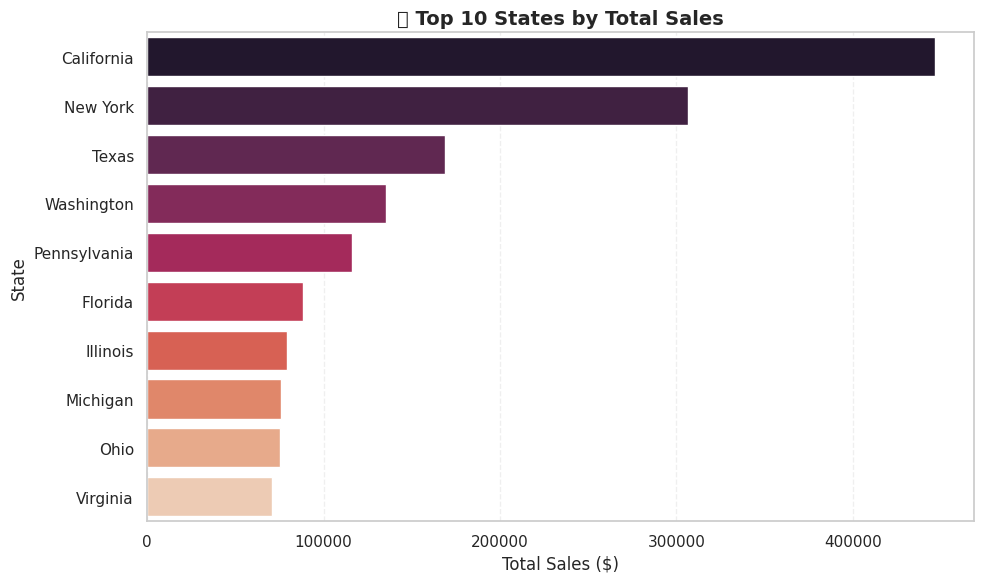

In [19]:
# --- Total Sales by State ---
import matplotlib.pyplot as plt
import seaborn as sns

state_sales = df.groupby('state')['sales'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=state_sales, y='state', x='sales', palette='rocket')

plt.title('🏙️ Top 10 States by Total Sales', fontsize=14, weight='bold')
plt.xlabel('Total Sales ($)')
plt.ylabel('State')
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


> 💡 **Insight:**  
> States like California and New York dominate total sales, likely due to larger markets and urban density.


/tmp/ipython-input-1568177614.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=segment_sales, x='segment', y='sales', palette='coolwarm')
/tmp/ipython-input-1568177614.py:14: UserWarning: Glyph 128101 (\N{BUSTS IN SILHOUETTE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128101 (\N{BUSTS IN SILHOUETTE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


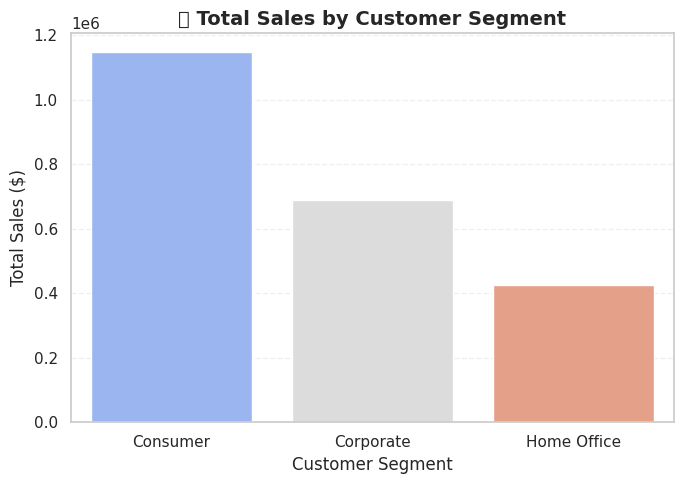

In [20]:
# --- Total Sales by Customer Segment ---
import matplotlib.pyplot as plt
import seaborn as sns

segment_sales = df.groupby('segment')['sales'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(7,5))
sns.barplot(data=segment_sales, x='segment', y='sales', palette='coolwarm')

plt.title('👥 Total Sales by Customer Segment', fontsize=14, weight='bold')
plt.ylabel('Total Sales ($)')
plt.xlabel('Customer Segment')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


> 💡 **Insight:**  
> The Consumer segment leads in total sales, showing strong B2C performance.  
> Corporate and Home Office offer room for growth through bulk or loyalty deals.


/tmp/ipython-input-362945329.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ship_sales, x='ship_mode', y='sales', palette='flare')
/tmp/ipython-input-362945329.py:14: UserWarning: Glyph 128666 (\N{DELIVERY TRUCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128666 (\N{DELIVERY TRUCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


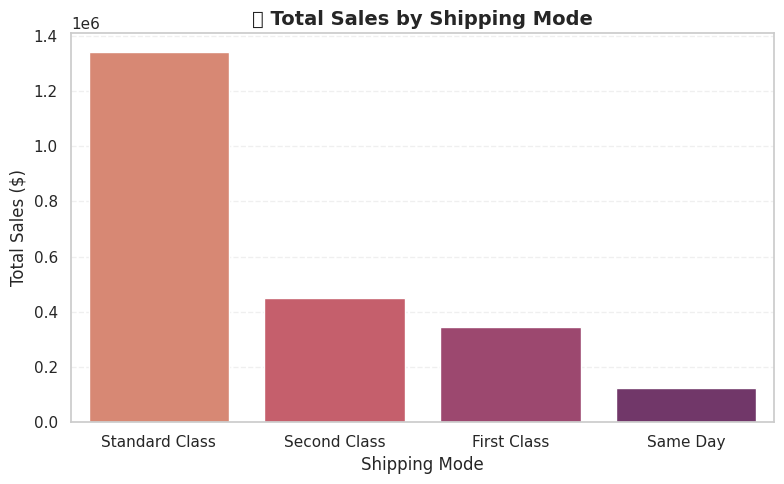

In [21]:
# --- Total Sales by Ship Mode ---
import matplotlib.pyplot as plt
import seaborn as sns

ship_sales = df.groupby('ship_mode')['sales'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=ship_sales, x='ship_mode', y='sales', palette='flare')

plt.title('🚚 Total Sales by Shipping Mode', fontsize=14, weight='bold')
plt.ylabel('Total Sales ($)')
plt.xlabel('Shipping Mode')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


> 💡 **Insight:**  
> Most customers prefer Standard Class shipping, suggesting price sensitivity.  
> Introducing faster delivery promotions could attract premium buyers.


---

<a id="category"></a>
## 🛍️ 5. Category & Product Insights

Analyzing which product categories and sub-categories generate the most revenue.

### 5.1 Sales by Category  
### 5.2 Sales by Sub-Category



/tmp/ipython-input-2014391919.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cat_sales, x='category', y='sales', palette='viridis')
/tmp/ipython-input-2014391919.py:14: UserWarning: Glyph 128717 (\N{SHOPPING BAGS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128717 (\N{SHOPPING BAGS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


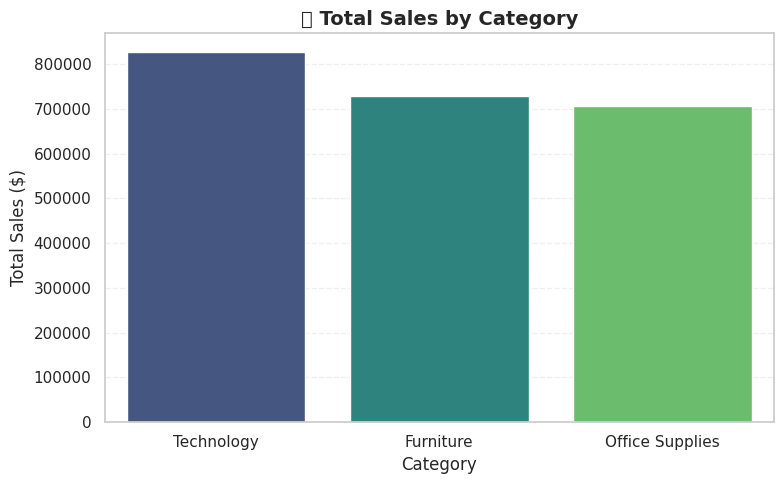

In [22]:
# --- Total Sales by Category ---
import matplotlib.pyplot as plt
import seaborn as sns

cat_sales = df.groupby('category')['sales'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=cat_sales, x='category', y='sales', palette='viridis')

plt.title('🛍️ Total Sales by Category', fontsize=14, weight='bold')
plt.ylabel('Total Sales ($)')
plt.xlabel('Category')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


> 💡 **Insight:**  
> Technology is the highest-earning category, followed by Furniture.  
> The company could prioritize tech-related products in advertising and inventory.


/tmp/ipython-input-436555237.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subcat_sales, x='sub-category', y='sales', palette='crest')
/tmp/ipython-input-436555237.py:15: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


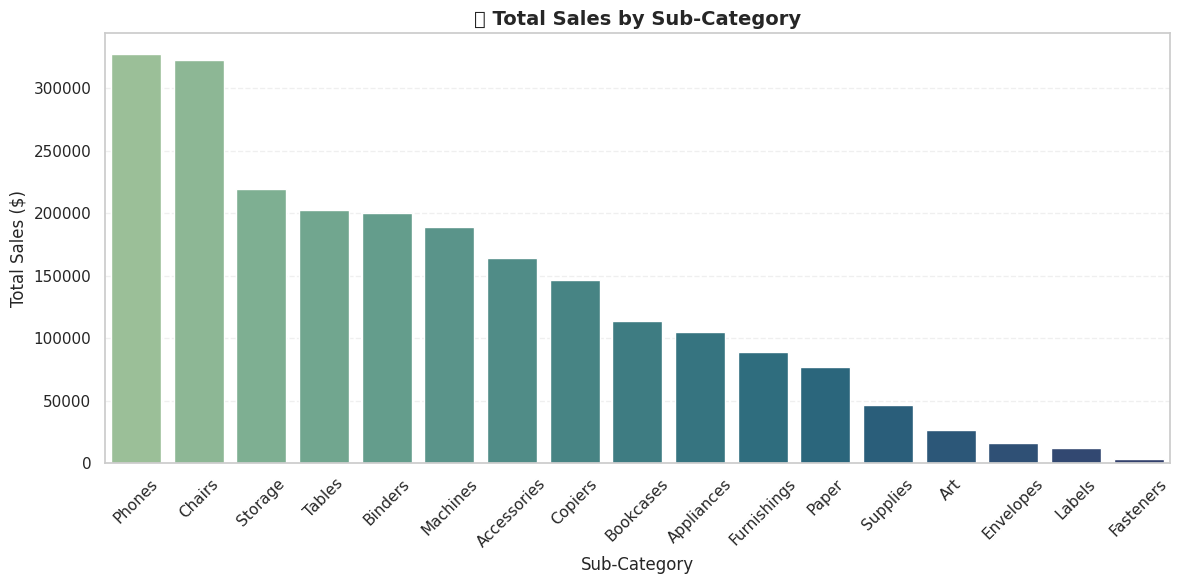

In [23]:
# --- Total Sales by Sub-Category ---
import matplotlib.pyplot as plt
import seaborn as sns

subcat_sales = df.groupby('sub-category')['sales'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=subcat_sales, x='sub-category', y='sales', palette='crest')

plt.title('📦 Total Sales by Sub-Category', fontsize=14, weight='bold')
plt.ylabel('Total Sales ($)')
plt.xlabel('Sub-Category')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


> 💡 **Insight:**  
> Phones and Chairs are top-performing sub-categories, while items like Labels and Fasteners have minimal sales.  
> Consider phasing out low-performing sub-categories or bundling them with popular ones.


---

<a id="operations"></a>
## ⏱️ 6. Operational Insights

We analyze shipping lead time (days between order and shipping) to understand delivery patterns and how they may impact sales.

### 6.1 Distribution of Shipping Lead Time  
### 6.2 Average Sales vs. Shipping Lead Time



/tmp/ipython-input-748170867.py:12: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


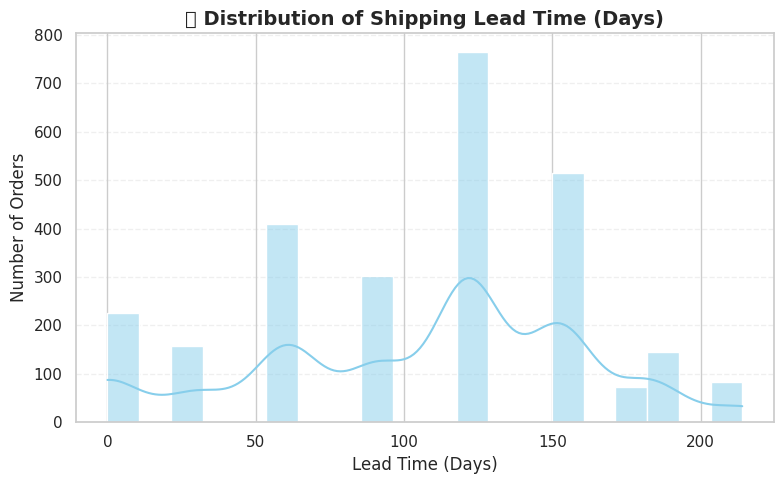

In [24]:
# --- Shipping Lead Time Distribution ---
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['lead_time_days'], bins=20, kde=True, color='skyblue')

plt.title('⏱️ Distribution of Shipping Lead Time (Days)', fontsize=14, weight='bold')
plt.xlabel('Lead Time (Days)')
plt.ylabel('Number of Orders')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


> 💡 **Insight:**  
> Most orders ship within 2–4 days, indicating efficient logistics and a healthy fulfillment process.


/tmp/ipython-input-3288528628.py:11: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


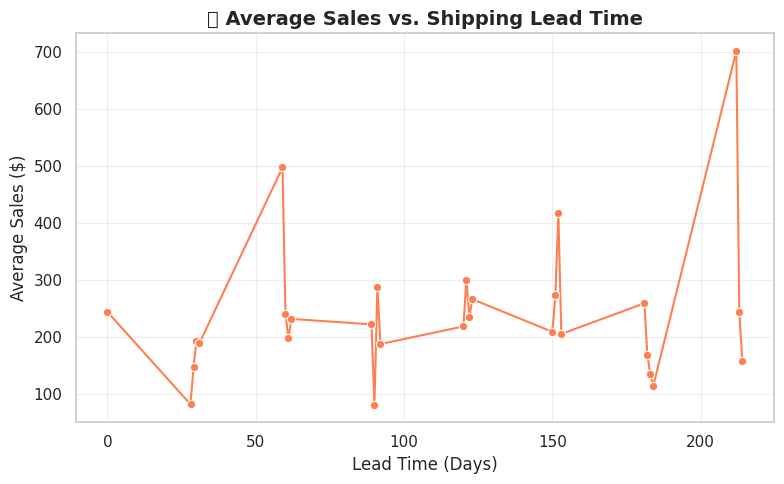

In [25]:
# --- Average Sales vs Shipping Lead Time ---
leadtime_sales = df.groupby('lead_time_days')['sales'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.lineplot(data=leadtime_sales, x='lead_time_days', y='sales', marker='o', color='coral')

plt.title('📦 Average Sales vs. Shipping Lead Time', fontsize=14, weight='bold')
plt.xlabel('Lead Time (Days)')
plt.ylabel('Average Sales ($)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


> 💡 **Insight:**  
> Sales remain steady across short lead times but drop slightly after 5 days — longer delivery times may reduce customer satisfaction.


---

<a id="recommendations"></a>
## 💼 7. Business Insights & Recommendations

### 🔹 Summary of Findings
- **Sales Trends:** Overall sales increased consistently from 2015 to 2018, with peaks near the end of each year (holiday season).  
- **Regional Performance:** The West region leads in revenue, while the Central region lags behind.  
- **Customer Segments:** Consumers are the most valuable segment, showing strong retail demand.  
- **Categories & Products:** Technology and Furniture dominate sales, especially Phones and Chairs.  
- **Operations:** Most orders ship within 2–4 days, but longer lead times slightly reduce sales potential.

---

### 💡 Key Recommendations
| Area | Recommendation | Expected Benefit |
|------|----------------|------------------|
| **Marketing** | Increase promotional activity in Q4 (Oct–Dec) | Boost seasonal revenue |
| **Regional Strategy** | Strengthen distribution in Central region | Improve regional balance |
| **Customer Focus** | Launch loyalty programs for Corporate clients | Encourage repeat orders |
| **Product Mix** | Prioritize Technology items and high-demand sub-categories | Higher profit margins |
| **Logistics** | Maintain fast shipping; offer incentives for premium delivery** | Enhance satisfaction & retention |

---

### 🧠 What I Learned
- Real-world data cleaning and feature engineering  
- Time-series, categorical, and geographical analysis  
- Creating clear data visualizations and insights  
- Structuring a notebook for professional presentation

---

### 🚀 Next Steps
- Add profit and discount analysis for deeper insights  
- Build a dashboard version in Power BI or Tableau  
- Explore predictive modeling for sales forecasting

---
